# Практична робота 3
Лесняк Андрій, 559мн

## Завдання 1. Провести аналіз залежності ефективності Ridge-регресії від кількості ознак (n_features) та кількості елементів (n_samples). Візуалізувати результати.

In [34]:
from sklearn.metrics import make_scorer, r2_score, silhouette_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression, make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import log

#### n_features

In [35]:
mse_n_features = []
r2_scores = []
for n_features in range(1, 20, 2):
    
    features, target = make_regression(n_samples=10000, 
                                       n_features=n_features, 
                                       random_state=1)
    features_train, features_test, target_train, target_test = train_test_split(features,
                                                                                target, 
                                                                                test_size=0.2, 
                                                                                random_state=1)
    
    ridge = Ridge()
    ridge.fit(features_train, target_train)
    predicted = ridge.predict(features_test)
    
    # MSE
    mse = mean_squared_error(target_test, predicted)
    mse_n_features.append(mse)
    
    # R^2 
    r2 = r2_score(target_test, predicted)
    r2_scores.append(r2)

Візуалізація. У цьому графіку і подальших самостійно задано ліміти осі ордината,  оскільки автоматичний вибір matplotlib може призвести до непоказових границь типу 1e-6+9.9999e-1, які не відображають істотні зміни.

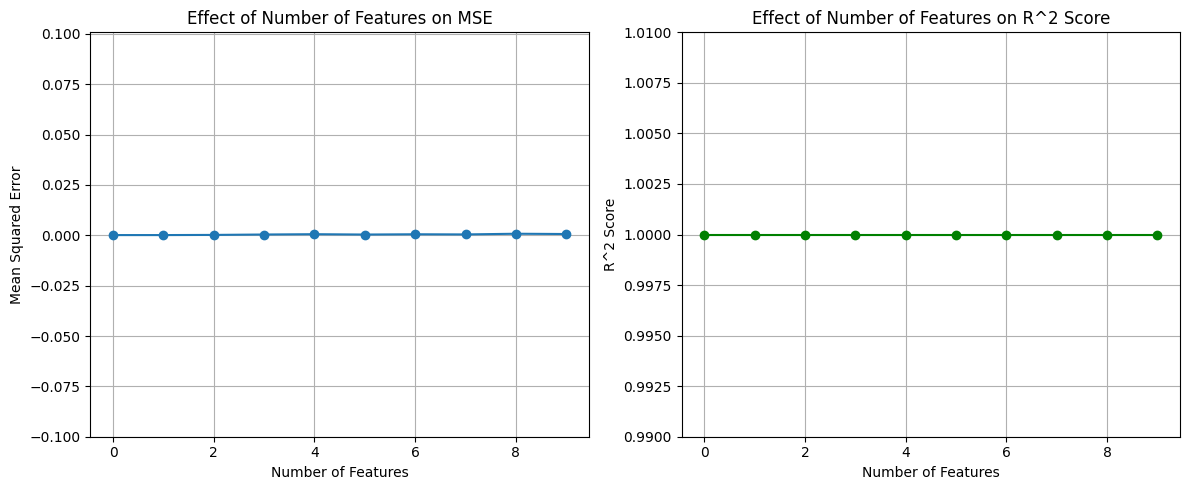

In [104]:
""" MSE plot """
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mse_n_features, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Number of Features on MSE')
plt.ylim(-0.1, max(mse_n_features) + 0.1)  # Adjust the range for better visualization
# plt.ylim(-1, 1)
plt.grid(True)

""" R^2 plot """
plt.subplot(1, 2, 2)
plt.plot(r2_scores, marker='o', color='green')
plt.xlabel('Number of Features')
plt.ylabel('R^2 Score')
plt.title('Effect of Number of Features on R^2 Score')
plt.ylim(0.99, 1.01) # Adjust the range for better visualization
plt.grid(True)

plt.tight_layout()
plt.show()

#### n_splits

In [97]:
mse_n_samples = []
r2_scores_samples = []

for n_samples in range(1000, 10000, 1000):
    features, target = make_regression(n_samples=n_samples, 
                                       n_features=2, 
                                       random_state=1)
    features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)
    
    ridge = Ridge()
    ridge.fit(features_train, target_train)
    predicted = ridge.predict(features_test)
    mse = mean_squared_error(target_test, predicted)
    mse_n_samples.append(mse)
    
    r2 = r2_score(target_test, predicted)
    r2_scores_samples.append(r2)

In [96]:
# # Create scatter plots with jitter
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.scatter(range(1000, 10000, 1000), mse_n_samples, alpha=0.5, color='skyblue')
# plt.xlabel('Number of Samples')
# plt.ylabel('Mean Squared Error')
# plt.ylim(-0.1, max(mse_n_features) + 0.1) 
# plt.title('Scatter Plot of MSE vs Number of Samples')

# plt.subplot(1, 2, 2)
# plt.scatter(range(1000, 10000, 1000), r2_scores_samples, alpha=0.5, color='lightgreen')
# plt.xlabel('Number of Samples')
# plt.ylabel('R^2 Score')
# plt.ylim(0.9, 1.1)
# plt.title('Scatter Plot of R^2 Score vs Number of Samples')

# plt.tight_layout()
# plt.show()

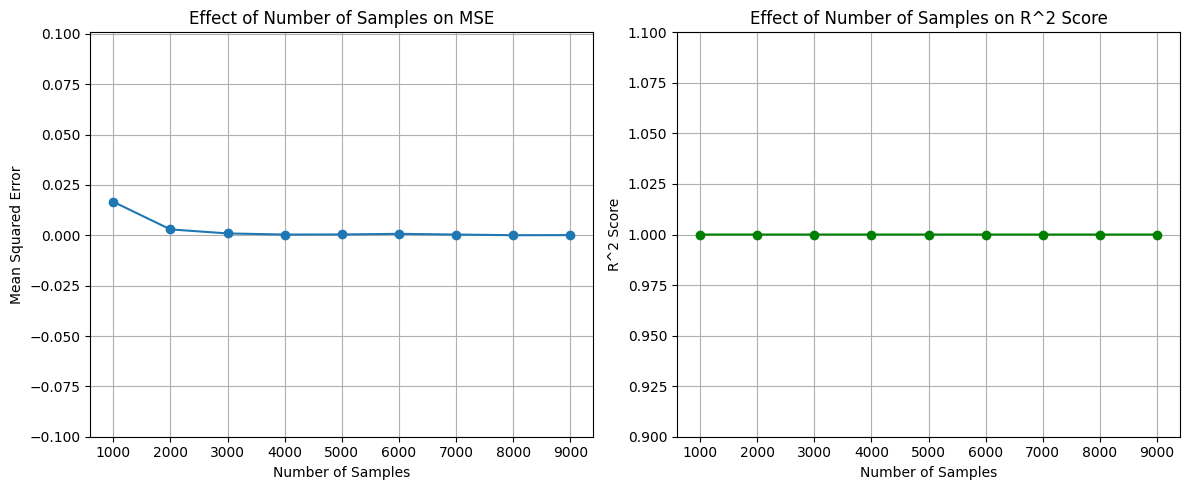

In [105]:
""" MSE plot """
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1000, 10000, 1000), mse_n_samples, marker='o')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Number of Samples on MSE')
plt.ylim(-0.1, max(mse_n_features) + 0.1) 
plt.grid(True)

""" R^2 plot """
plt.subplot(1, 2, 2)
plt.plot(range(1000, 10000, 1000),r2_scores_samples, marker='o', color='green')
plt.xlabel('Number of Samples')
plt.ylabel('R^2 Score')
plt.title('Effect of Number of Samples on R^2 Score')
plt.ylim(0.9, 1.1)
plt.grid(True)

plt.tight_layout()
plt.show()

## Завдання 2. Провести аналіз залежності silhouette_score-індекса від:

### - cluster_std

In [106]:
silhouette_scores_std = []
std_range = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

for std in std_range:
    features, labels = make_blobs(n_samples=1000, 
                                  n_features=2, 
                                  centers=3, 
                                  cluster_std=std, 
                                  random_state=16)
    model = KMeans(n_clusters=3, 
                   random_state=1).fit(features)
    predicted = model.labels_
    silhouette = silhouette_score(features, predicted)
    silhouette_scores_std.append(silhouette)

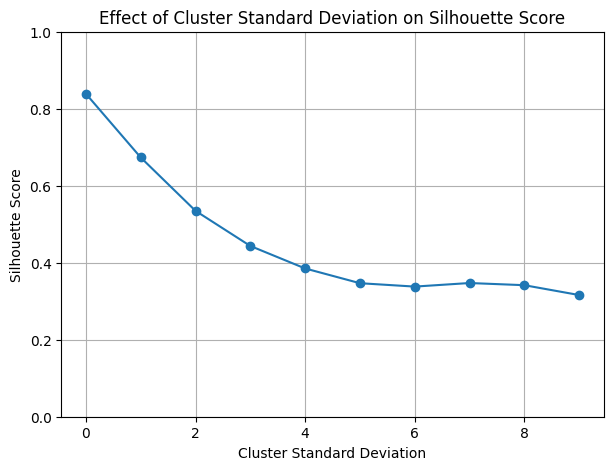

In [117]:
plt.figure(figsize=(7, 5))
plt.plot(silhouette_scores_std, marker='o')
plt.xlabel('Cluster Standard Deviation')
plt.ylabel('Silhouette Score')
plt.title('Effect of Cluster Standard Deviation on Silhouette Score')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

### - centers

In [108]:
silhouette_scores_centers = []

for centers in range(2, 10):
    features, labels = make_blobs(n_samples=1000, 
                                  n_features=2, 
                                  centers=centers, 
                                  cluster_std=2.5, 
                                  random_state=16)
    model = KMeans(n_clusters=3, random_state=1).fit(features)
    predicted = model.labels_
    silhouette = silhouette_score(features, predicted)
    silhouette_scores_centers.append(silhouette)

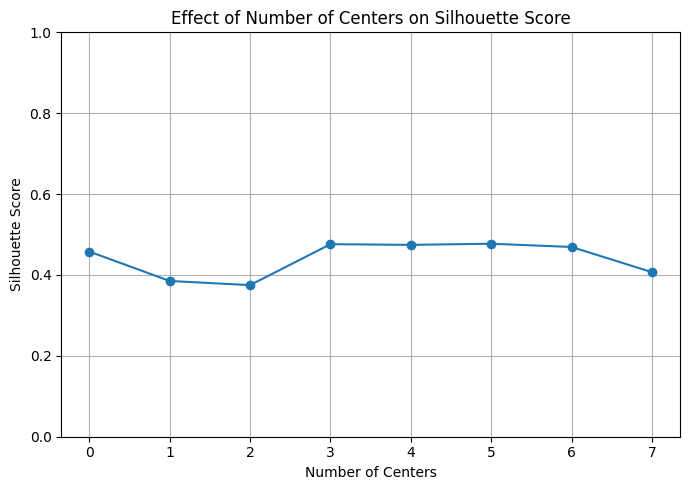

In [109]:
plt.figure(figsize=(7, 5))
plt.plot(silhouette_scores_centers, marker='o')
plt.xlabel('Number of Centers')
plt.ylabel('Silhouette Score')
plt.title('Effect of Number of Centers on Silhouette Score')
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## Завдання 3. Розглянути кластеризацію 3-вимірних даних.

In [115]:
features_3d, labels_3d = make_blobs(n_samples=10000, 
                                    n_features=3, 
                                    centers=3, 
                                    cluster_std=2.5,
                                    shuffle = True,
                                    random_state=16
                                    )

# Model
model_3d = KMeans(n_clusters=3, random_state=1).fit(features_3d)
predicted_3d = model_3d.labels_

# Evaluate
score_3d = silhouette_score(features_3d, predicted_3d)
print('Silhouette Score for 3D Data:', score_3d)

Silhouette Score for 3D Data: 0.4773251457972887


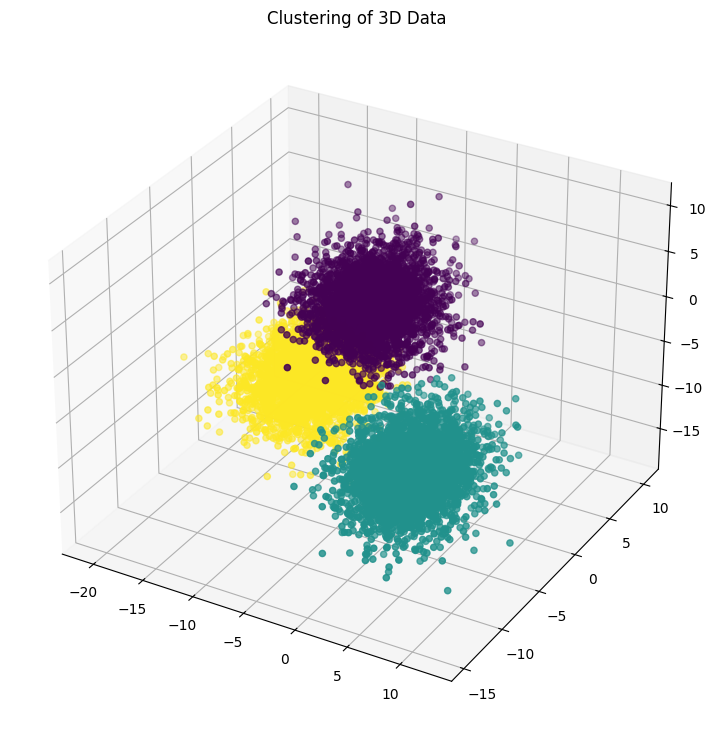

In [111]:
# Visualize predictions
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_3d[:, 0], features_3d[:, 1], features_3d[:, 2], c=predicted_3d)
plt.title('Clustering of 3D Data')
plt.show()

#### Інтерактивний графік

https://plotly.com/python/3d-scatter-plots/

https://plotly.com/python/reference/scatter3d/

In [ ]:
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter3d(
    x=features_3d[:, 0],
    y=features_3d[:, 1],
    z=features_3d[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color=predicted_3d,
        colorscale='Viridis',
        opacity=0.8
    )
)

# Create layout
layout = go.Layout(
    title='Clustering of 3D Data',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    ),
    width=1000, 
    height=1000   
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()